In [94]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import helper
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**WORLD GDP PER CAPITA**

In [84]:
gdp_pc_df = helper.format_data('data/gdp_per_capita.csv')

In [ ]:
gdp_pc_df.head()

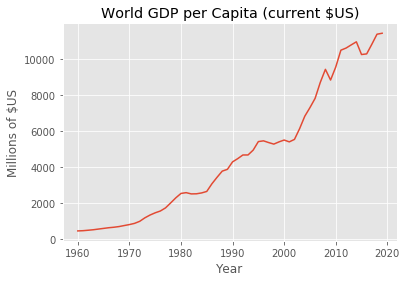

In [87]:
x_data = range(1960, 2021)
y_data = gdp_pc_df['World']

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) # or 211
ax1.plot(x_data, y_data)
ax1.set_title('World GDP per Capita (current $US)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Millions of $US')

plt.show()
# fig.savefig('world_gdp.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**IMPORTS / EXPORTS**

In [88]:
imports_df = helper.format_data('data/imports.csv')
exports_df = helper.format_data('data/exports.csv')

In [ ]:
helper.plot_imp_exp(imports_df, exports_df, 'World', df1_label='Imports', df2_label='Exports', title='Trade as % of World GDP')
plt.show()
# fig.savefig('world_trade.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**TOTAL WORLD GDP**

In [97]:
gdp_df = helper.format_data('data/gdp.csv')
gdp_df.drop(gdp_df.iloc[:, 1:-2], axis=1, inplace=True)

In [98]:
sorted_gdp = gdp_df.loc[country_list]['2019'].sort_values(ascending = False)

world_gdp = gdp_df.loc['World']['2019']

top_sum = sorted_gdp[:5].sum()

In [99]:
gdp_df2 = helper.format_data('data/gdp.csv')
gdp_df2.drop(gdp_df2.iloc[:, 10:-2], axis=1, inplace=True)

In [ ]:
gdp_df2['GDP Difference'] = gdp_df2['2019'] - gdp_df2['1968']
gdp_df2['% change'] = gdp_df2['GDP Difference'] / gdp_df2['1968']

world_diff = gdp_df2.loc['World']['GDP Difference'] ################
gdp_df2['world %'] = gdp_df2['GDP Difference'] / world_diff

diff = gdp_df2.loc[country_list].sort_values(by='GDP Difference', ascending=False)
reg_diff = gdp_df2.loc[region_list].sort_values(by='GDP Difference', ascending=False)

print(reg_diff.head(10))
print(world_diff)

In [ ]:
reg_diff['world %'].plot.bar(rot=60, title='GDP Growth by Region, 1968-2019', color='blue', position=.05)
# plt.savefig('region_gdp_growth.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**% GDP FOR TRADE REGIONS**

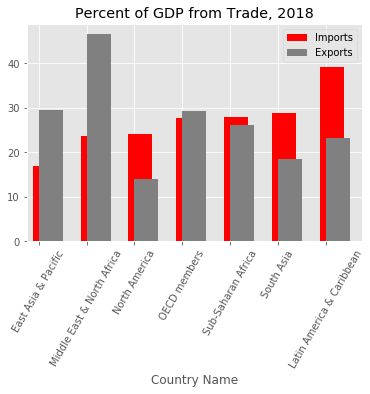

In [108]:
imports_df['I % change'] = (imports_df.loc['2018'] - imports_df.loc['1970']) / imports_df.loc['2018']
exports_df['exp % change'] = (exports_df.loc['2018'] - exports_df.loc['1970']) / exports_df.loc['2018']

ax = imports_df[region_list].loc['2018'].sort_values().plot.bar(label = 'Imports', rot=60, title='Percent of GDP from Trade, 2018', color='red', position=.25, stacked=True)
exports_df[region_list].loc['2018'].plot.bar(label='Exports', rot=60, ax=ax, color='gray', stacked=True, position=.00)
ax.legend()

plt.show()
# plt.savefig('trade_regional.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**GDP SHARE - PIE CHART**

In [ ]:
labels = 'US', 'China', 'Japan', 'Germany', 'India', 'Other Countries'
sizes = [sorted_gdp.loc['United States'], sorted_gdp.loc['China'], sorted_gdp.loc['Japan'], sorted_gdp.loc['Germany'], sorted_gdp.loc['India'], top_sum]
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops=dict(color="black"))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autotexts, size=8, weight='bold')

plt.show()
# fig1.savefig('top_gdp.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**GDP GROWTH RATES**

In [111]:
gdp_growth = helper.format_data('data/gdp_growth.csv')

In [ ]:
regions = ['World', 'United States', 'China', 'Japan', 'Germany', 'India']
colors = ['green', 'blue', 'red', 'gray', 'black', 'orange']
helper.plot_gdp_growth_rates(gdp_growth, regions, colors, title='GDP Growth Rate')

# fig.savefig('growth_rate.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**IMPORT EXPORT GROWTH RATES**

In [ ]:
''' Plotting imports and exports by region'''
colors = ['green', 'blue', 'red', 'gray', 'black', 'orange', 'purple']
helper.plot_trade_rates(imports_df, region_list, colors, title='Imports as % of GDP by Region')
# plt.ylim(0, 55)

# fig.savefig('import_rate.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

In [ ]:
helper.plot_trade_rates(exports_df, region_list, colors, title='Exports as % of GDP by Region')
plt.ylim(0, 55) 

# fig.savefig('export_rate.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**COUNTRY AND REGION LISTS**

In [109]:
country_list = ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria','Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faroe Islands', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Gibraltar', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala',
       'Guam', 'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 
       'Indonesia',  'Isle of Man', 'India', 'Ireland', 'Iran, Islamic Rep.', 'Iraq',
       'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kiribati',
       'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Lao PDR', 'Lebanon', 'Liberia', 'Libya', 'St. Lucia',
       'Liechtenstein', 'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China',
       'St. Martin (French part)', 'Morocco', 'Monaco', 'Moldova', 'Madagascar', 'Maldives', 'Mexico',
       'Marshall Islands', 'North Macedonia', 'Mali', 'Malta', 'Myanmar', 'Montenegro',
       'Mongolia', 'Northern Mariana Islands', 'Mozambique', 'Mauritania', 'Mauritius', 'Malawi', 'Malaysia', 'Namibia',
       'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'Nepal', 'Nauru', 'New Zealand',  'Oman',
       'Pakistan', 'Panama', 'Peru', 'Philippines', 'Palau', 'Papua New Guinea', 'Poland', 
       'Puerto Rico', 'Korea, Dem. People’s Rep.', 'Portugal', 'Paraguay', 'West Bank and Gaza',  'French Polynesia', 'Qatar',
       'Romania', 'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Sudan', 'Senegal', 'Singapore', 'Solomon Islands',
       'Sierra Leone', 'El Salvador', 'San Marino', 'Somalia', 'Serbia', 'South Sudan', 'Sao Tome and Principe',
       'Suriname', 'Slovak Republic', 'Slovenia', 'Sweden', 'Eswatini', 'Sint Maarten (Dutch part)', 'Seychelles', 'Syrian Arab Republic',
       'Turks and Caicos Islands', 'Chad', 'Togo', 'Thailand', 'Tajikistan', 'Turkmenistan', 'Timor-Leste',  'Tonga', 
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu', 'Tanzania', 'Uganda', 'Ukraine',
       'Uruguay', 'United States', 'Uzbekistan', 'St. Vincent and the Grenadines', 'Venezuela, RB',
       'British Virgin Islands', 'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu', 'Samoa', 'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe']

region_list = [ 
       'East Asia & Pacific',
       'Middle East & North Africa',
       'North America',
       'OECD members',
       'Sub-Saharan Africa',
       'South Asia',
       'Latin America & Caribbean'
       ]